In [1]:
import math
from logging import debug

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

from PIL.ImageColor import colormap
from scipy.stats import linregress
import libraries as lib

C:\Users\bono\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
directory = "../../../../OneDrive - HvA/Logfiles/SOLAR/2024/20241024_sleeptest/0056 - 20241024T115530 1h25m5s 12.315km De Rijp - Uitgeest - De Rijp"
directory2 = "../../../../OneDrive - HvA/Logfiles/SOLAR/2024/20241024_sleeptest/0058 - 20241024T182042 7m15s 0.022km Aalsmeer"
result1 = lib.DataUitzoekenGui(directory)
result2 = lib.DataUitzoekenGui(directory2)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '1_Master_08_05.csv', '2_MPPT_0_05_05.csv', '3_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_05_05.csv', '3_MPPT_05_07.csv', '4_MPPT…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [3]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result1:
    merged_df1 = result1['merged_df'].copy()
    merged_df2 = result2['merged_df'].copy()
    # Gebruik merged_df zoals je wilt
else:
    print("De data is nog niet geladen.")
merged_df2

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische variatie,...,"2_XMega VRaw spanning, in V","2_Externe ingangsspanning, in V","2_Spanning op V_Analog, in V","2_Spanning op de supercaps, in V","2_Externe temperatuur, in graden Celsius","2_Interne temperatuur, in graden Celsius","2_Laadstroom van de supercaps, in mA","2_Stroom door de load cell, in mA",2_Datalogger port,2_Format header (>21|02)
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.777667,1.153667,5.075667,5.760000,0.026667,18.406333,41.766667,12.100000,B,21|02
0 days 00:02:18,9.0,138.3859,144.130,162043.0,5215.9766,446.7043,0.0,175.3,241024.0,NaN,...,3.775400,1.153600,5.073400,5.757400,0.026400,18.393800,41.720000,12.080000,B,21|02
0 days 00:02:19,9.0,139.4048,145.148,162044.0,5215.9766,446.7043,0.0,175.3,241024.0,NaN,...,3.775429,1.152714,5.073000,5.756714,0.026286,18.391857,41.728571,12.085714,B,21|02
0 days 00:02:20,9.0,140.2626,146.006,162045.0,5215.9766,446.7045,0.0,175.3,241024.0,NaN,...,3.775600,1.152200,5.073000,5.757000,0.026400,18.395000,41.640000,12.100000,B,21|02
0 days 00:02:21,9.0,141.2742,147.018,162046.0,5215.9766,446.7045,0.0,175.3,241024.0,NaN,...,3.773857,1.152000,5.070571,5.753857,0.026286,18.387571,41.628571,12.071429,B,21|02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:09:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.769400,1.154200,5.073200,5.759200,0.027000,18.566600,38.500000,12.080000,B,21|02
0 days 00:09:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.768800,1.154400,5.072800,5.758400,0.026800,18.565400,38.500000,12.080000,B,21|02
0 days 00:09:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.767333,1.154000,5.070667,5.756000,0.026000,18.555167,38.433333,12.000000,B,21|02


In [10]:
#filter de eerste 100 waarders erut
merged_df1 = merged_df1.iloc[0:-1]
lib.plot_trajectory_map(merged_df1['1_Latitude'].dropna(), merged_df1['1_Longitude'].dropna(), merged_df1['1_Snelheid over de grond in km/h'].dropna())

In [11]:
#lib.plot_trajectory_map(merged_df2['1_Latitude'].dropna(), merged_df2['1_Longitude'].dropna(), merged_df2['1_Snelheid over de grond in km/h'].dropna())

In [12]:
# filterout when the acceleration is below 0.1 en hoger dan -0.1
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'].diff() < 0.1]
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'].diff() > -0.1]

#wanneer snelheid onder de 0 is filteren
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'] > 0]

#filter alles voor 10:00 uur eruit 'Tijd [UUMMSS]' en na 10:40
merged_df1 = merged_df1[merged_df1['1_Tijd'] > 100000]
#merged_df1 = merged_df1[merged_df1['1_Tijd'] < 104000]

In [13]:
merged_df1['2_Loadcell in N'] = (merged_df1['2_Processed median-filtered sample waarde van de load cell ADC'] * -2.471 * 10**-5 - 5.583)
merged_df2['2_Loadcell in N'] = (merged_df2['2_Processed median-filtered sample waarde van de load cell ADC'] * -2.471 * 10**-5 - 5.583)
merged_df1['2_Loadcell in kg'] = merged_df1['2_Loadcell in N'] / 9.81
merged_df2['2_Loadcell in kg'] = merged_df2['2_Loadcell in N'] / 9.81

In [14]:
#filter eruit wanneer de diff in loadceel N groter is dan 10
#merged_df1 = merged_df1[merged_df1['2_Loadcell in N'].diff() < 10]
#filter eruit als de loadcell onder de 50 zit de N
merged_df1 = merged_df1[merged_df1['2_Loadcell in N'] > 0]


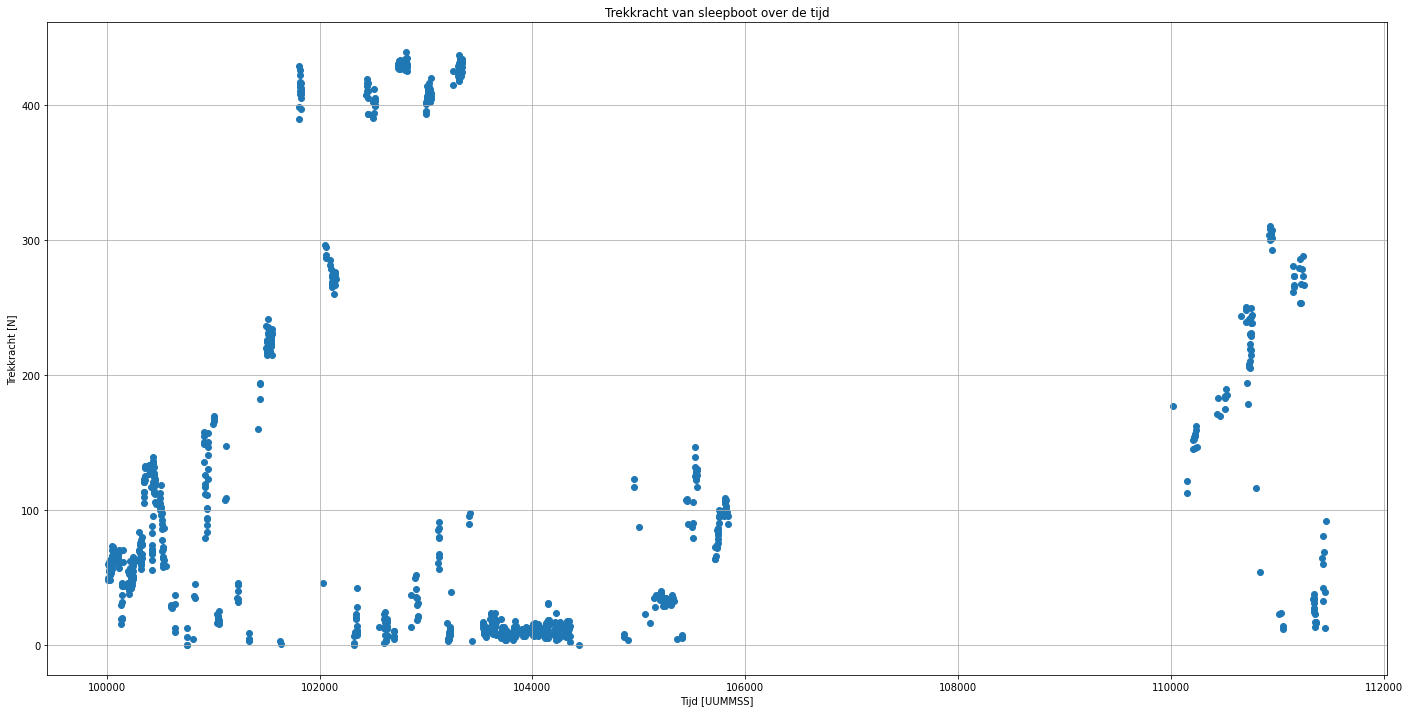

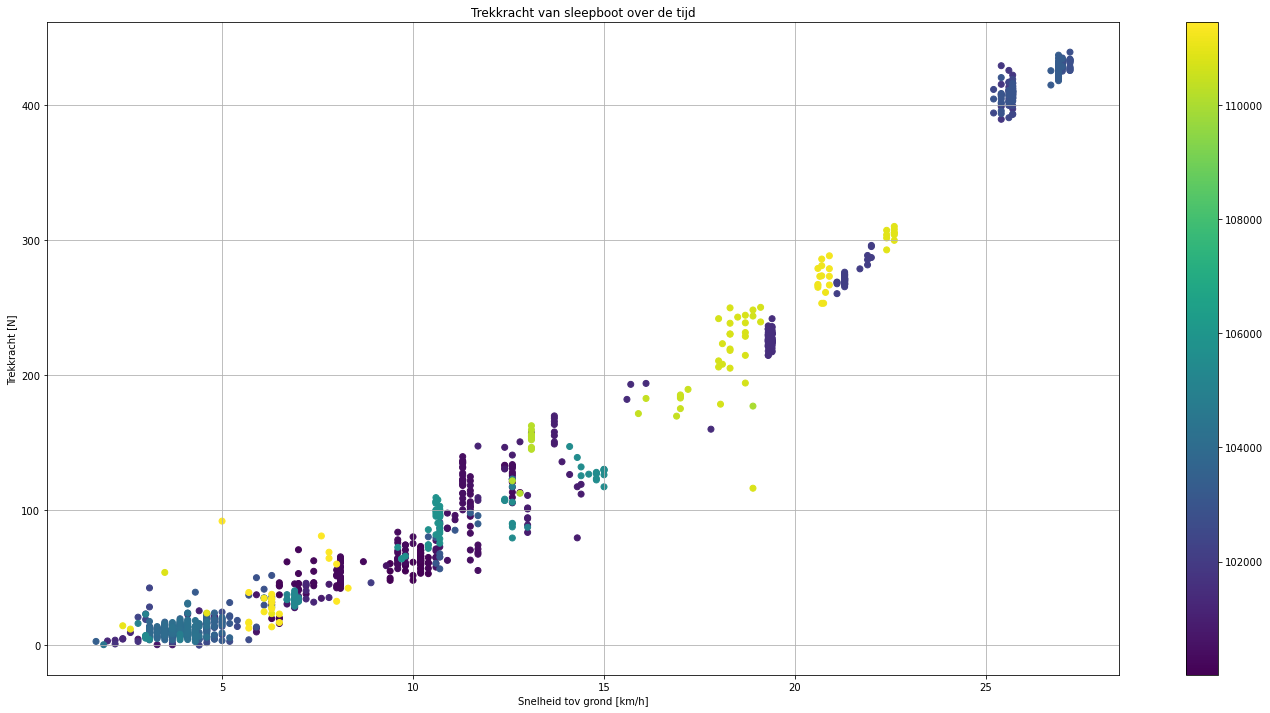

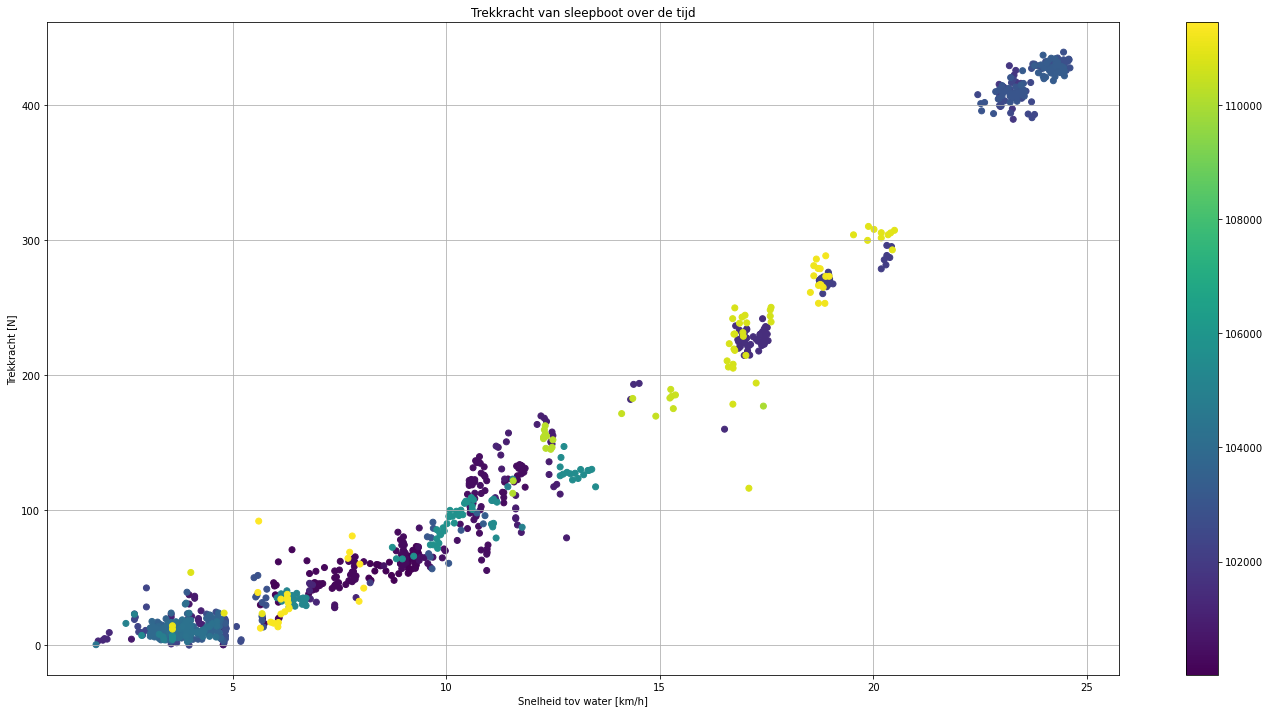

In [17]:
#plt.scatter(merged_df2['1_Tijd'].to_numpy(),merged_df2['2_Loadcell in kg'].to_numpy())
#plt.xlabel('Tijd [UU-MM-SS]')
#plt.ylabel('Gewicht [kg]')
#plt.title('Gewicht van de boot over de tijd')
#plt.grid(True)
#plt.show()
#
#
plt.figure(figsize=(24, 12))
plt.scatter(merged_df1['1_Tijd'].to_numpy(),merged_df1['2_Loadcell in N'].to_numpy())
plt.xlabel('Tijd [UUMMSS]')
plt.ylabel('Trekkracht [N]')
plt.title('Trekkracht van sleepboot over de tijd')
plt.grid(True)
plt.show()

plt.figure(figsize=(24, 12))
plt.scatter(merged_df1['1_Snelheid over de grond in km/h'].to_numpy(),merged_df1['2_Loadcell in N'].to_numpy(),c=merged_df1['1_Tijd'].to_numpy())
plt.colorbar()
plt.xlabel('Snelheid tov grond [km/h]')
plt.ylabel('Trekkracht [N]')
plt.title('Trekkracht van sleepboot over de tijd')
plt.grid(True)
plt.show()

plt.figure(figsize=(24, 12))
plt.scatter(merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy(),merged_df1['2_Loadcell in N'].to_numpy(),c=merged_df1['1_Tijd'].to_numpy())
plt.colorbar()
plt.xlabel('Snelheid tov water [km/h]')
plt.ylabel('Trekkracht [N]')
plt.title('Trekkracht van sleepboot over de tijd')
plt.grid(True)
plt.show()

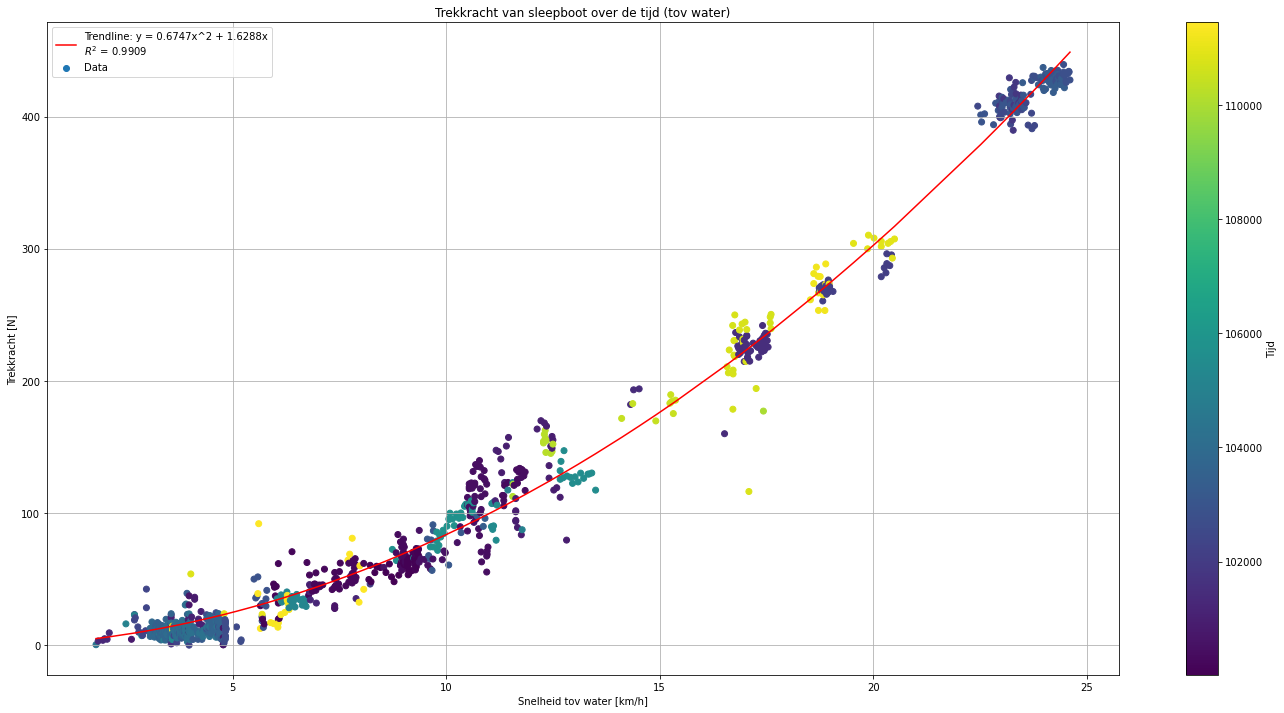

In [22]:
# Tweede plot: Snelheid ten opzichte van het water
sorted_indices2 = np.argsort(merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy())
x2 = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()[sorted_indices2]
y2 = merged_df1['2_Loadcell in N'].to_numpy()[sorted_indices2]

# Kwadratische fit door de oorsprong (y = ax + bx^2, zonder intercept)
A2 = np.vstack([x2**2, x2]).T
coeffs2, _, _, _ = np.linalg.lstsq(A2, y2, rcond=None)
a2, b2 = coeffs2
trendline2 = a2 * x2**2 + b2 * x2

# Bereken R^2 voor de tweede plot
ss_res2 = np.sum((y2 - trendline2) ** 2)
ss_tot2 = np.sum((y2 - np.mean(y2)) ** 2)
r_squared2 = 1 - (ss_res2 / ss_tot2)

plt.figure(figsize=(24, 12))
plt.scatter(x2, y2, c=merged_df1['1_Tijd'].to_numpy()[sorted_indices2], label='Data')
plt.plot(x2, trendline2, color='red', label=f'Trendline: y = {a2:.4f}x^2 + {b2:.4f}x\n$R^2$ = {r_squared2:.4f}')
plt.colorbar(label='Tijd')
plt.xlabel('Snelheid tov water [km/h]')
plt.ylabel('Trekkracht [N]')
plt.title('Trekkracht van sleepboot over de tijd (tov water)')
plt.legend()
plt.grid(True)
plt.show()


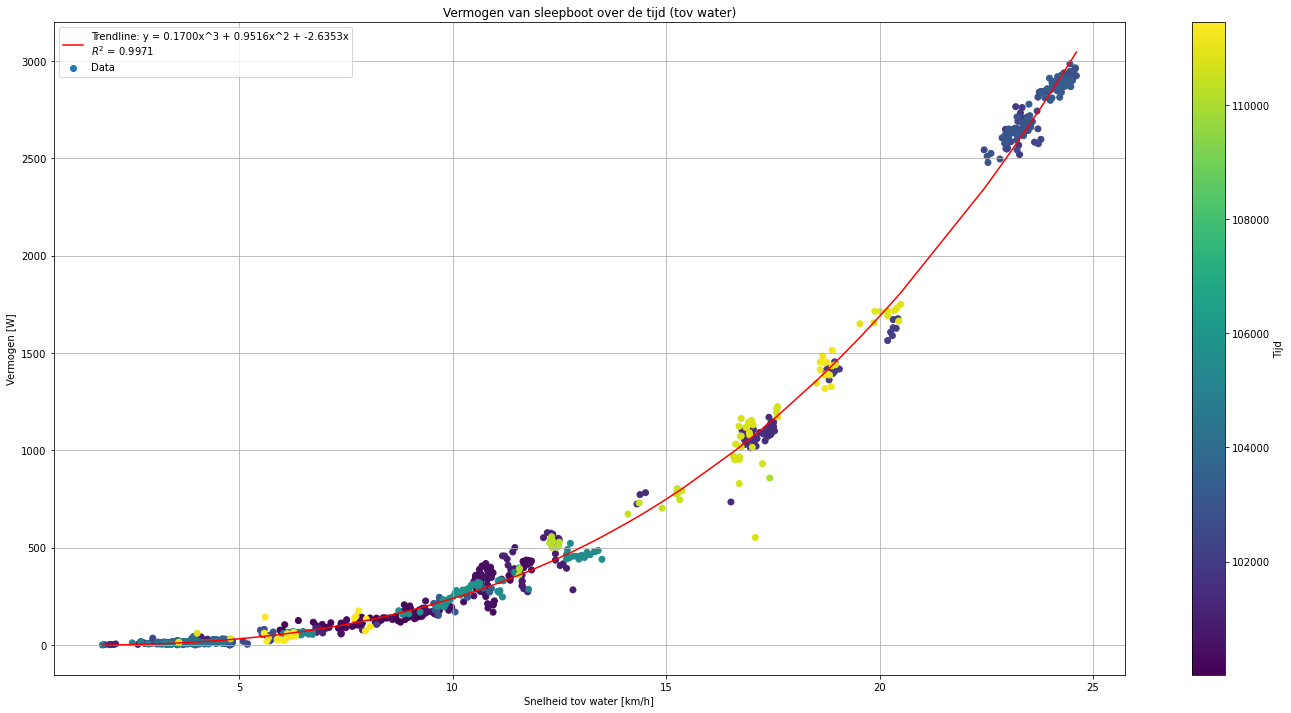

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Snelheid omzetten van km/h naar m/s
merged_df1["speed_water_ms"] = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy() * 0.27778

# Vermogen berekenen
merged_df1['Vermogen aantrekking'] = merged_df1['2_Loadcell in N'].to_numpy() * merged_df1["speed_water_ms"]

# Data voor de fitting
x = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
y = merged_df1['Vermogen aantrekking'].to_numpy()

# Sorteer de data op snelheid voor een mooiere trendlijn
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

# Pas een derdegraads polynoom aan door de oorsprong (y = ax^3 + bx^2 + cx)
A = np.vstack([x_sorted**3, x_sorted**2, x_sorted]).T
coeffs, _, _, _ = np.linalg.lstsq(A, y_sorted, rcond=None)
a, b, c = coeffs  # Coëfficiënten van het derdegraads polynoom

# Bereken de trendlijn
trendline = a * x_sorted**3 + b * x_sorted**2 + c * x_sorted

# Bereken R^2
ss_res = np.sum((y_sorted - trendline) ** 2)
ss_tot = np.sum((y_sorted - np.mean(y_sorted)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Plotten van snelheid ten opzichte van vermogen met trendlijn en R^2
plt.figure(figsize=(24, 12))
plt.scatter(x, y, c=merged_df1['1_Tijd'].to_numpy(), label='Data')
plt.plot(x_sorted, trendline, color='red', label=f'Trendline: y = {a:.4f}x^3 + {b:.4f}x^2 + {c:.4f}x\n$R^2$ = {r_squared:.4f}')
plt.colorbar(label='Tijd')
plt.xlabel('Snelheid tov water [km/h]')
plt.ylabel('Vermogen [W]')
plt.title('Vermogen van sleepboot over de tijd (tov water)')
plt.grid(True)
plt.legend()
plt.show()


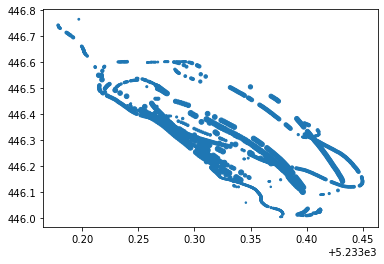

In [136]:
plt.scatter(merged_df1['1_Latitude'].dropna(), merged_df1['1_Longitude'].dropna(), merged_df1['1_Snelheid over de grond in km/h'].dropna())

In [6]:
#filter snelheid onder de 0 eruit
merged_df1 = merged_df1[merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] > 0]

#snelheid boven de 30 eruit
merged_df1 = merged_df1[merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] < 20]

#filter eruit alles acceleraties met .diff() die groter zijn dan 0.1
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'].diff() < 0.1]

#acceleraties boven de -0.1 eruit
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'].diff() > -0.1]

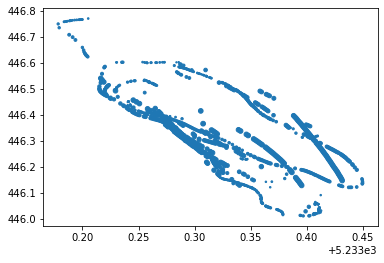

In [8]:
plt.scatter(merged_df1['1_Latitude'].dropna(), merged_df1['1_Longitude'].dropna(), merged_df1['1_Snelheid over de grond in km/h'].dropna())

In [8]:
#data["8_VESC input vermogen (W)"] = data['8_VESC input current (A)']*data['8_VESC input voltage (V)']
#data["7_Acceleratie boot tov grond"] = data["7_Snelheid over de grond in km/h"].diff()
#data["7_Acceleratie boot tov water"] = data["7_Snelheid tenopzichte van het water in Kilometers per uur"].diff()

In [44]:
def calculate_theoretical_distance(data, mass_kg=1000):
    """
    Calculate the theoretical distance assuming no resistances, using total energy available.
    
    Parameters:
    - data: DataFrame containing energy data.
    - mass_kg: Mass of the boat in kg (default is 1000 kg).
    
    Returns:
    - DataFrame with theoretical cumulative distance over time.
    """
    total_energy = data['VESC input vermogen (W)'].cumsum()
    total_energy = total_energy.fillna(0).clip(lower=0)  # Ensure no NaN or negative energy values
    
    # Calculate theoretical speed using E = 1/2 * m * v^2 -> v = sqrt(2 * E / m)
    data['Theoretical Speed (m/s)'] = np.sqrt(2 * total_energy / mass_kg)
    data['Theoretical Speed (m/s)'] = data['Theoretical Speed (m/s)'].fillna(0)  # Replace NaN values with 0
    
    # Calculate theoretical cumulative distance as speed * time interval
    data['Theoretical Distance (m)'] = data['Theoretical Speed (m/s)'].cumsum()
    return data

In [45]:
def bereken_snelheden(df, kolom_wattage,begin_snelheid = 0.01, massa=500, eta=0.7, rho_water=1000, Cd_water=0.3, A_water=0.6, rho_lucht=1.225, Cd_lucht=0.1, A_lucht=0.8, dt=1):
    """
    Bereken de snelheid van een boot op basis van een variabel vermogen.

    Parameters:
    df (pd.DataFrame): DataFrame met daarin de vermogensgegevens.
    kolom_wattage (str): Naam van de kolom die het vermogen (in watt) bevat.
    massa (float): Massa van de boot in kg (default: 500).
    eta (float): Efficiëntie van het voortstuwingssysteem (default: 0.7).
    rho_water (float): Dichtheid van water in kg/m³ (default: 1000).
    Cd_water (float): Weerstandscoëfficiënt voor water (default: 0.7).
    A_water (float): Nat oppervlak van de boot in m² (default: 3).
    rho_lucht (float): Dichtheid van lucht in kg/m³ (default: 1.225).
    Cd_lucht (float): Weerstandscoëfficiënt voor lucht (default: 1.0).
    A_lucht (float): Frontaal oppervlak van de boot in m² (default: 1.5).
    dt (float): Tijdsinterval in seconden (default: 0.1).

    Returns:
    pd.DataFrame: DataFrame met een extra kolom 'theoretische snelheid met weerstand' die de snelheid (in m/s) over de tijd bevat.
    """
    # Bereken de weerstandsfactor k op basis van de gegeven parameters
    k = 0.5 * (rho_water * Cd_water * A_water + rho_lucht * Cd_lucht * A_lucht)

    # Zorg ervoor dat de snelheid kolom wordt aangemaakt en initialiseer de eerste waarde
    snelheden = np.zeros(len(df))
    snelheden[0] = begin_snelheid  # Beginwaarde voor snelheid om deling door nul te vermijden

    # Iteratieve berekening van de snelheid voor elke tijdstap
    for i in range(1, len(df)):
        P_motor = df.iloc[i][kolom_wattage]
        v_oud = snelheden[i-1]
        
        if P_motor > 0 and v_oud > 0:
            F_aandrijving = (P_motor * eta) / v_oud
        else:
            F_aandrijving = 0
        
        F_weerstand = k * v_oud**2
        a = (F_aandrijving - F_weerstand) / massa
        snelheden[i] = v_oud + a * dt
        if snelheden[i] < 0:
            snelheden[i] = 0  # Snelheid kan niet negatief zijn

    # Voeg de snelheden toe aan de oorspronkelijke DataFrame
    df['theoretische snelheid met weerstand'] = snelheden
    return df

In [46]:
data_new = calculate_theoretical_distance(data_new)
data_new = bereken_snelheden(data_new, 'VESC input vermogen (W)')
data_new["Verschil snelheid grond en theoretisch"]= data_new["Snelheid over de grond in km/h"]-data_new['theoretische snelheid met weerstand']*3.6
data_new["Verschil snelheid water en theoretisch"]= data_new["Snelheid tenopzichte van het water in Kilometers per uur"]-data_new['theoretische snelheid met weerstand']*3.6

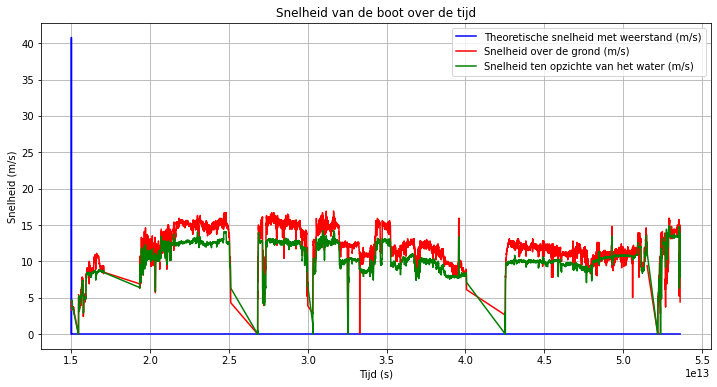

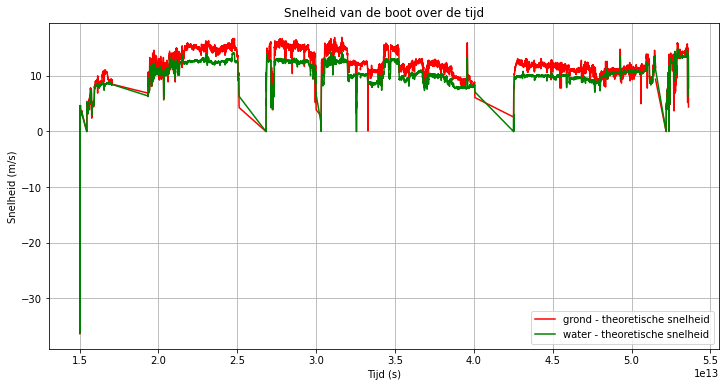

In [48]:
plt.figure(figsize=(12, 6))

# Plot de theoretische snelheid met weerstand
plt.plot(data_new.index, data_new['theoretische snelheid met weerstand']*3.6, label='Theoretische snelheid met weerstand (m/s)', color='b')

# Plot de snelheid over de grond
plt.plot(data_new.index, data_new['Snelheid over de grond in km/h'], label='Snelheid over de grond (m/s)', color='r')

# Plot de snelheid ten opzichte van het water
plt.plot(data_new.index, data_new['Snelheid tenopzichte van het water in Kilometers per uur'], label='Snelheid ten opzichte van het water (m/s)', color='g')

plt.xlabel('Tijd (s)')
plt.ylabel('Snelheid (m/s)')
plt.title('Snelheid van de boot over de tijd')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(data_new.index, data_new["Verschil snelheid grond en theoretisch"], label='grond - theoretische snelheid', color='r')
plt.plot(data_new.index,data_new['Verschil snelheid water en theoretisch'] , label='water - theoretische snelheid', color='g')
plt.xlabel('Tijd (s)')
plt.ylabel('Snelheid (m/s)')
plt.title('Snelheid van de boot over de tijd')
plt.legend()
plt.grid(True)
plt.show()

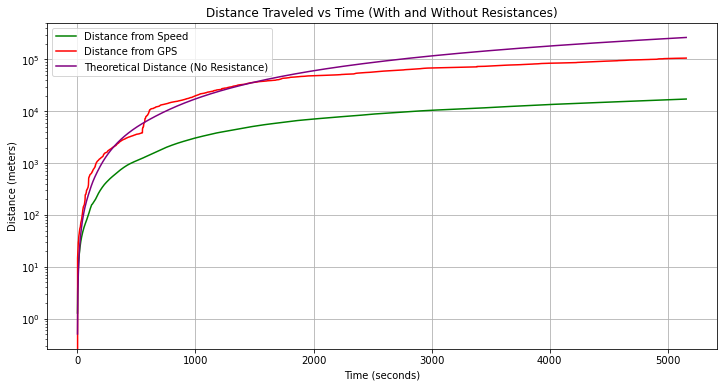

In [114]:
# Plotting distance traveled versus time for the four distance calculations
time = range(len(data_new))

plt.figure(figsize=(12, 6))

# Plot distance versus time
plt.plot(time, data_new['Cumulative Distance from Speed (m)'], label='Distance from Speed', color='green')
plt.plot(time, data_new['Cumulative Distance from GPS (m)'], label='Distance from GPS', color='red')
plt.plot(time, data_new['Theoretical Distance (m)'], label='Theoretical Distance (No Resistance)', color='purple', linestyle='-')
#plt.plot(time, data_new['Theoretical Distance with Resistance (m)'], label='Theoretical Distance with Resistance', color='blue', linestyle='--')

plt.xlabel('Time (seconds)')
plt.ylabel('Distance (meters)')
plt.title('Distance Traveled vs Time (With and Without Resistances)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()